In [1]:
from google.colab import files
uploaded = files.upload()

Saving features.txt to features.txt
Saving subject_test.txt to subject_test.txt
Saving subject_train.txt to subject_train.txt
Saving X_test.txt to X_test.txt
Saving X_train.txt to X_train.txt
Saving y_test.txt to y_test.txt
Saving y_train.txt to y_train.txt


In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
features = list()
with open('features.txt') as file:
    features = [line.split()[1] for line in file.readlines()]

In [6]:
X_train = pd.read_csv('X_train.txt', delim_whitespace = True, header = None)
X_train.columns = features
X_train['subject'] = pd.read_csv('subject_train.txt', header = None, squeeze = True)

y_train = pd.read_csv('y_train.txt', names = ['Activity'], squeeze = True)
y_train_labels = y_train.map({1: 'moving', 
                              2:'moving',
                              3:'moving',
                              4:'still', 
                              5:'still',
                              6:'still'})

for i in range(0, 7352):
  if (y_train[i] == 1) or (y_train[i] == 2) or (y_train[i] == 3):
    y_train[i] = 0;
  else:
    y_train[i] = 1;

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis = 1)
y_train = train.ActivityName

print(X_train.shape, y_train.shape)
print(train.shape)
print(X_train)

(7352, 561) (7352,)
(7352, 564)
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245     

In [7]:
X_train_1 = pd.DataFrame()
X_train_1['tBodyAcc-mean()-X'] = X_train['tBodyAcc-mean()-X']
X_train_1['tBodyAcc-mean()-Y'] = X_train['tBodyAcc-mean()-Y']
X_train_1['tBodyAcc-mean()-Z'] = X_train['tBodyAcc-mean()-Z']
X_train_1['tBodyGyro-mean()-X'] = X_train['tBodyGyro-mean()-X']
X_train_1['tBodyGyro-mean()-Y'] = X_train['tBodyGyro-mean()-Y']
X_train_1['tBodyGyro-mean()-Z'] = X_train['tBodyGyro-mean()-Z']
X_train_1['tBodyAccMag-mean()'] = X_train['tBodyAccMag-mean()']

print(X_train_1)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyGyro-mean()-X  tBodyGyro-mean()-Y  tBodyGyro-mean()-Z  \
0              -0.006101           -0.031365            0.107725   
1              -0.016112           -0.083894            0.100584   
2              

In [8]:
X_test = pd.read_csv('X_test.txt', delim_whitespace = True, header = None)
X_test.columns = features
X_test['subject'] = pd.read_csv('subject_train.txt', header = None, squeeze = True)

y_test = pd.read_csv('y_test.txt', names = ['Activity'], squeeze = True)
y_test_labels = y_test.map({1: 'moving', 
                              2:'moving',
                              3:'moving',
                              4:'still', 
                              5:'still',
                              6:'still'})

for i in range(0, 2947):
  if (y_test[i] == 1) or (y_test[i] == 2) or (y_test[i] == 3):
    y_test[i] = 0;
  else:
    y_test[i] = 1;

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis = 1)
y_test = test.ActivityName

print(X_test.shape, y_test.shape) 
print(test.shape)

(2947, 561) (2947,)
(2947, 564)


In [9]:
X_test_1 = pd.DataFrame()
X_test_1['tBodyAcc-mean()-X'] = X_test['tBodyAcc-mean()-X']
X_test_1['tBodyAcc-mean()-Y'] = X_test['tBodyAcc-mean()-Y']
X_test_1['tBodyAcc-mean()-Z'] = X_test['tBodyAcc-mean()-Z']
X_test_1['tBodyGyro-mean()-X'] = X_test['tBodyGyro-mean()-X']
X_test_1['tBodyGyro-mean()-Y'] = X_test['tBodyGyro-mean()-Y']
X_test_1['tBodyGyro-mean()-Z'] = X_test['tBodyGyro-mean()-Z']
X_test_1['tBodyAccMag-mean()'] = X_test['tBodyAccMag-mean()']

print(X_test_1)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyGyro-mean()-X  tBodyGyro-mean()-Y  tBodyGyro-mean()-Z  \
0               0.119976           -0.091792            0.189629   
1              -0.001552           -0.187291            0.180705   
2              

In [10]:
X_test = X_test_1
X_train = X_train_1

In [11]:
labels = ['moving', 'still']

In [12]:
def plot_confusion_matrix(confusion_matrix, classes):
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis = 1)[:, np.newaxis]

    plt.imshow(confusion_matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title('Normalized confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    threshold = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], '.2f'), horizontalalignment = "center", color = "white" if confusion_matrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, classes):
    results = dict()
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('Training time: ', results['training_time'], '\n')
    
    test_start_time = datetime.now()
    y_predicted = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('Testing time: ', results['testing_time'], '\n')
    results['predicted'] = y_predicted
   
    accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_predicted)
    results['accuracy'] = accuracy
    print('Accuracy: ', accuracy, '\n')

    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
    results['confusion_matrix'] = confusion_matrix

    plt.figure(figsize = (4, 4))
    plt.grid(b = False)
    plot_confusion_matrix(confusion_matrix, classes)
    plt.show()
    
    classification_report = metrics.classification_report(y_test, y_predicted)
    results['classification_report'] = classification_report
    
    results['model'] = model
    
    return results

Training time:  0:00:00.047571 

Testing time:  0:00:00.002622 

Accuracy:  0.997285374957584 



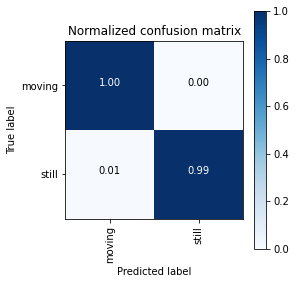

In [14]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action = 'ignore', category = ConvergenceWarning)

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2', 'l1']}
logistic_regression = linear_model.LogisticRegression()
logistic_regression_grid = GridSearchCV(logistic_regression, parameters, cv = 3, verbose = 1, n_jobs = -1)
logistic_regression_grid_results =  perform_model(logistic_regression, X_train, y_train, X_test, y_test, labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time:  0:00:02.400109 

Testing time:  0:00:00.002574 

Accuracy:  0.9969460468272819 



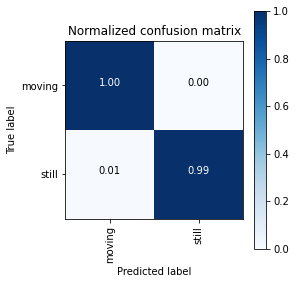

In [15]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
linear_svc = LinearSVC(tol = 0.00005)
linear_svc_grid = GridSearchCV(linear_svc, parameters, n_jobs = -1, verbose = 1)
linear_svc_grid_results = perform_model(linear_svc_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:00:04.077544 

Testing time:  0:00:00.018007 

Accuracy:  0.999321343739396 



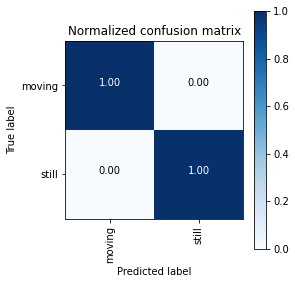

In [16]:
parameters = {'C':[2, 8, 16],'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel = 'rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid = parameters, n_jobs = -1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:00:00.626610 

Testing time:  0:00:00.001728 

Accuracy:  0.998642687478792 



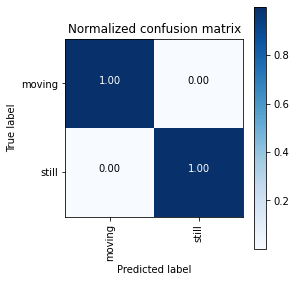

In [17]:
parameters = {'max_depth':np.arange(3, 10, 2)}
decision_tree = DecisionTreeClassifier()
decision_tree_grid = GridSearchCV(decision_tree, parameters, n_jobs = -1)
decision_tree_grid_results = perform_model(decision_tree_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:02:25.533834 

Testing time:  0:00:00.005254 

Accuracy:  0.99830335934849 



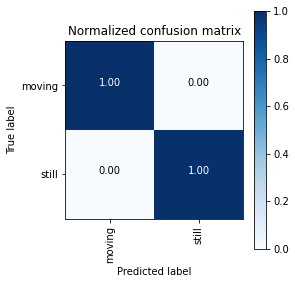

In [18]:
params = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(3, 15, 2)}
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, params, n_jobs = -1)
random_forest_grid_results = perform_model(random_forest_grid, X_train, y_train, X_test, y_test, labels)

In [19]:
print('Accuracy: \n\n')
print('Logistic regression: ', logistic_regression_grid_results['accuracy']*100, '%')
print('Linear SVC: ', linear_svc_grid_results['accuracy']*100, '%')
print('RBF SVM Classifier: ', rbf_svm_grid_results['accuracy']*100, '%')
print('Decision Tree: ', decision_tree_grid_results['accuracy']*100, '%')
print('Random Forest: ', random_forest_grid_results['accuracy']*100, '%')

Accuracy: 


Logistic regression:  99.7285374957584 %
Linear SVC:  99.6946046827282 %
RBF SVM Classifier:  99.93213437393959 %
Decision Tree:  99.86426874787921 %
Random Forest:  99.830335934849 %
